## Experiment on my son
Use the package face_recognition to calculate similarities between "a younger me", my son and some youth soccer players. 

In [8]:
import face_recognition
from PIL import Image, ImageDraw
%matplotlib inline

images with multiple faces, my son and "the younger me" (as a test)

In [9]:
## image with multiple faces
image = face_recognition.load_image_file("Selection_063.png")
# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(image)
face_encodings = face_recognition.face_encodings(image, face_locations)

images of a younger me....

In [13]:
# image of me to match
me = face_recognition.load_image_file("Longhow01.jpg")
me_encoding = face_recognition.face_encodings(me)[0]

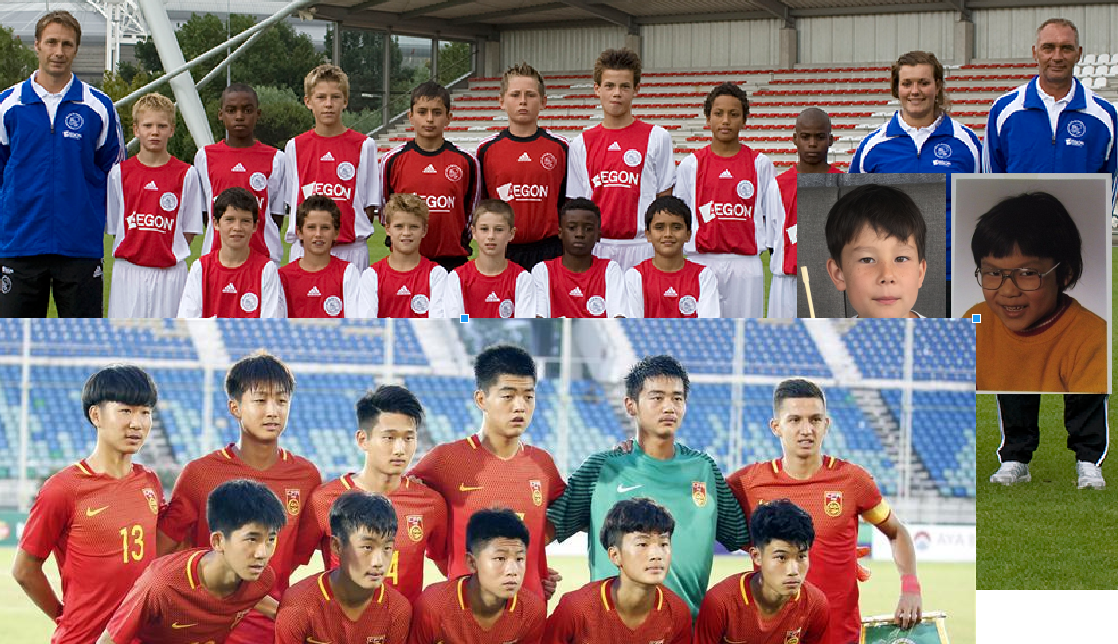

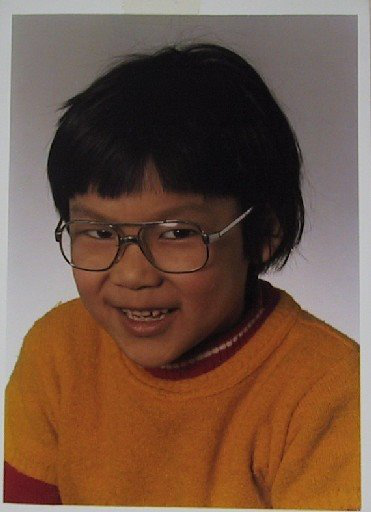

In [16]:
pil_image = Image.fromarray(image)
pil_image_me = Image.fromarray(me)
# Create a Pillow ImageDraw Draw instance to draw with
display(pil_image)
display(pil_image_me)

Calculate similiarities between "younger me" and the faces on the group photo's. Put the bounding boxes and distances on the images.

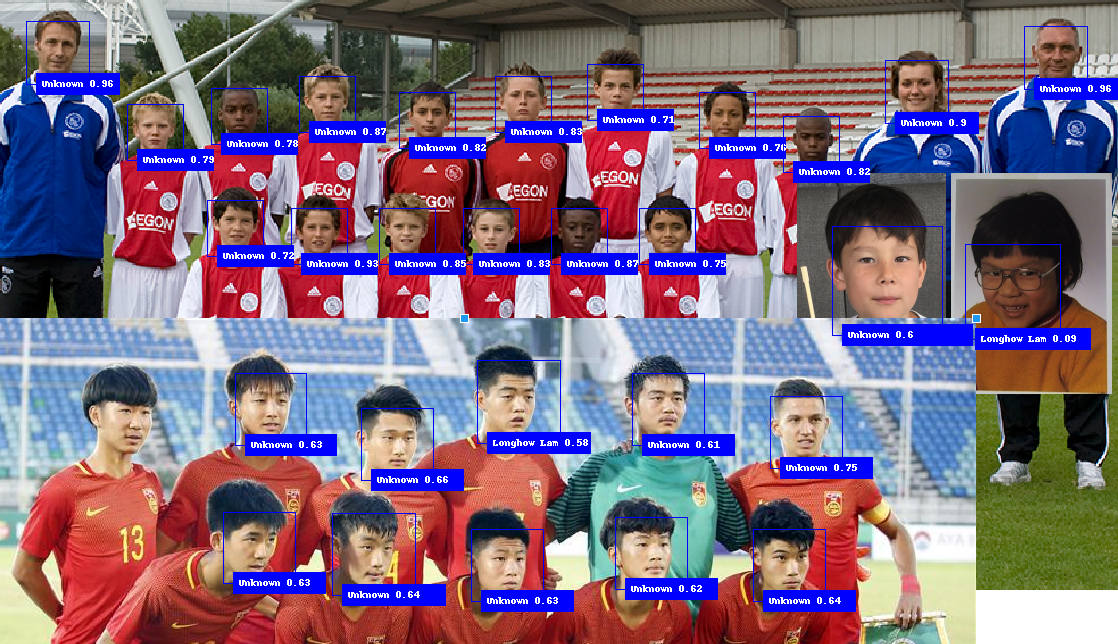

In [17]:
draw = ImageDraw.Draw(pil_image)
known_face_names = ["Longhow Lam"]

# Loop through each face found in the image to match with me
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces([me_encoding], face_encoding)
    # also claculate the distance
    face_distance = face_recognition.face_distance(face_encoding, [me_encoding])
    
    name = "Unknown " + str(round(face_distance[0],2))

    # If a match was found in known_face_encodings, just use the first one.
    if True in matches:
        first_match_index = matches.index(True)
        name = known_face_names[first_match_index] + " " +  str(round(face_distance[0],2))

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left-10, top-10), (right+10, bottom+10)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height +10), (right+40, bottom+20)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height +15), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

The younger me in the group photo is recognizes as the one with the smallest distance, and my son then has the second smallest distance

In [18]:
face_distances = face_recognition.face_distance(face_encodings, me_encoding)

In [19]:
face_distances

array([0.83121532, 0.7463081 , 0.66253534, 0.74957445, 0.89578492,
       0.87032439, 0.62626264, 0.95556742, 0.82426934, 0.63471985,
       0.60112045, 0.61123385, 0.92816047, 0.86859628, 0.72353631,
       0.83228587, 0.7146345 , 0.6186744 , 0.57902143, 0.77607969,
       0.78713946, 0.64011432, 0.95655638, 0.75500734, 0.62751269,
       0.84719121, 0.09053877, 0.63536228, 0.81862342])